# Example of Map Generation

Map generated in 0.017008 seconds


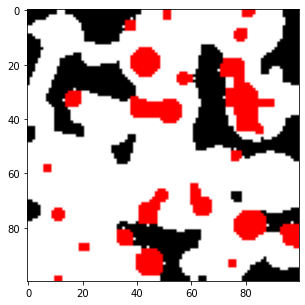

In [6]:
from swarm_mapping.map import Map
import time

t0 = time.time()
m = Map(100, 100, space_fill=0.6, hazard_fill=0.2, fast=True)
tf = time.time()
m.show()
print(f"Map generated in {round(tf - t0, 6)} seconds")

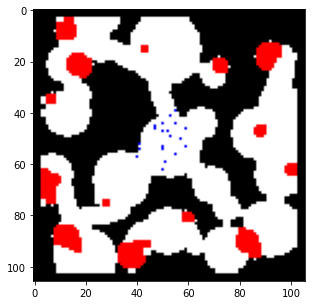

In [12]:
from swarm_mapping.world import World, Agent
from swarm_mapping.map import Map

w = World(100, 100, 20, fast=True)
w.show()

Current position: [11.46116135 11.39223227]
Current velocity: [0.49029034 0.09805807]
New position: [11.95145169 11.49029034]
Pixel position: [12 11]


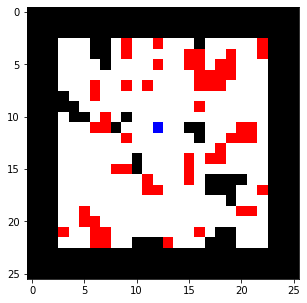

In [9]:
w.step(True)
w.show()

In [58]:
print(agent)

Agent at (8.260353851136102,10.327004030865856), with velocity (-0.7396461488638977, -0.6729959691341433), alive: True


In [62]:
agent = w.agents[0]
agent.proximity()

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
import cv2
import numpy as np

# Display size
display_width = 800
display_height = 800

step = 0
while True:
    frame = w.render()
    frame = cv2.resize(frame, (display_width, display_height), interpolation = cv2.INTER_AREA)
    cv2.imshow('Sim',cv2.cvtColor((frame*255).astype(np.uint8), cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    w.step()
    step += 1
cv2.destroyAllWindows()

In [9]:
for agent in w.agents:
    print(agent)

Agent at (69.2079106412231,100.4876408067175), with velocity (-0.316227766016838, -0.9486832980505138), alive: True
Agent at (90.57400848234364,105.61830256101715), with velocity (-0.0, 1.0), alive: True
Agent at (78.14592567807017,90.2251166661411), with velocity (-1.0, -0.0), alive: False
Agent at (100.69834078396399,80.44948399516741), with velocity (0.7071067811865475, -0.7071067811865475), alive: True
Agent at (65.49436917464236,98.13498960820866), with velocity (-0.8944271909999159, -0.4472135954999579), alive: True
Agent at (109.67441661591894,115.57287892855977), with velocity (0.7071067811865475, 0.7071067811865475), alive: True
Agent at (91.24631709150881,91.77483354622206), with velocity (-0.0, 1.0), alive: True
Agent at (117.41889581562592,91.32152806248254), with velocity (-0.7071067811865475, -0.7071067811865475), alive: True
Agent at (108.50698264061735,119.7695267938329), with velocity (0.8944271909999159, 0.4472135954999579), alive: True
Agent at (104.42077631722748,11